# Check if tracer has saturated the domain and how other species are changing with time

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
#output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "X:/Richards_flow_tr"#big_sat"

In [34]:
Regimes = ["Fast", "Medium","Slow"]
trialist = proc.masterscenarios("Unsaturated")
mTrial = list(trialist.keys())
droplist = ["114","128","177","182","185"]
Trial = list(t for t in mTrial if t not in droplist)

# Tracer concentration profile: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of tracer in 1D domain
- Defining the function for heatmaps of tracer concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [4]:
species = proc.speciesdict("Unsaturated")
gvarnames = ["Tracer_study"]
print(species["Tracer_study"]["TecIndex"])

5


### Tracer concentration profile at the outlet with time

IndexError: index 9 is out of bounds for axis 0 with size 9

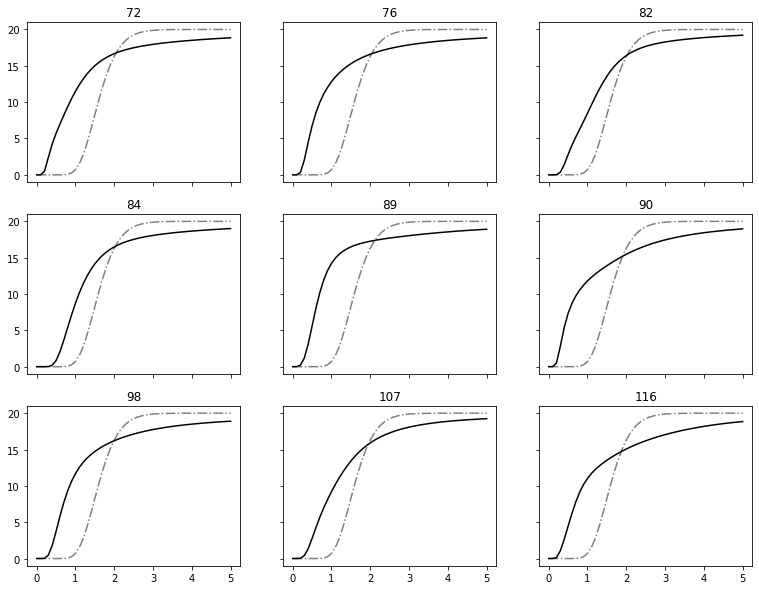

In [28]:
Trial = list(t for t in trialist if trialist[t]["Het"]==5 and t not in droplist)
days_slow = list(range(501))
days_medium = list(range(51))
days_fast = list(np.arange(0,5.1,0.1))
figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
for t in Trial:
    for r,xindex in zip(["Fast"], [days_fast]):
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        i = Trial.index(t)
        host = axes.flat[i]
        file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,-1,0,-1,113, gvarnames,"Unsaturated")
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,-1,0,-1,113, gvarnames,"Unsaturated")
        host.plot(xindex, conctimeh[:, -6, 0],label=gvarnames[0],color='grey',linestyle="-.")
        host.plot(xindex, conctime[:, -6, 0],label=gvarnames[0],color='k',linestyle="-")
        host.set_title(t)
for ax in axes[-1,:]:
    ax.set_xlabel ("Time (days)")
for ax in axes[:,0]:
    ax.set_ylabel("Tracer (uM)")

### Tracer concentration profile in the domain at a select time point

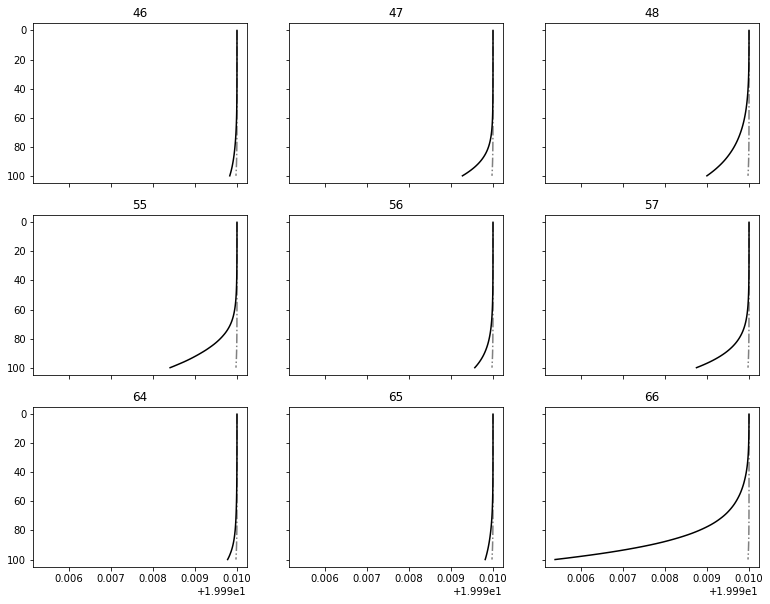

In [23]:
yindex = list(np.arange(0,5.1,0.05))
figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
for t in Trial:
    for r in ["Fast"]:
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        i = Trial.index(t)
        host = axes.flat[i]
        file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,-1,0,-1,113, gvarnames,"Unsaturated")
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,-1,0,-1,113, gvarnames,"Unsaturated")
        host.plot(conctimeh[-1, 6:-6, 0],yindex,label=gvarnames[0],color='grey',linestyle="-.")
        host.plot(conctime[-1, 6:-6, 0],yindex,label=gvarnames[0],color='k',linestyle="-")
        host.set_title(t)
        figbig.gca().invert_yaxis()

### Final outputs to display flow wise and variance wise tracer concentration profile at outlet with time

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

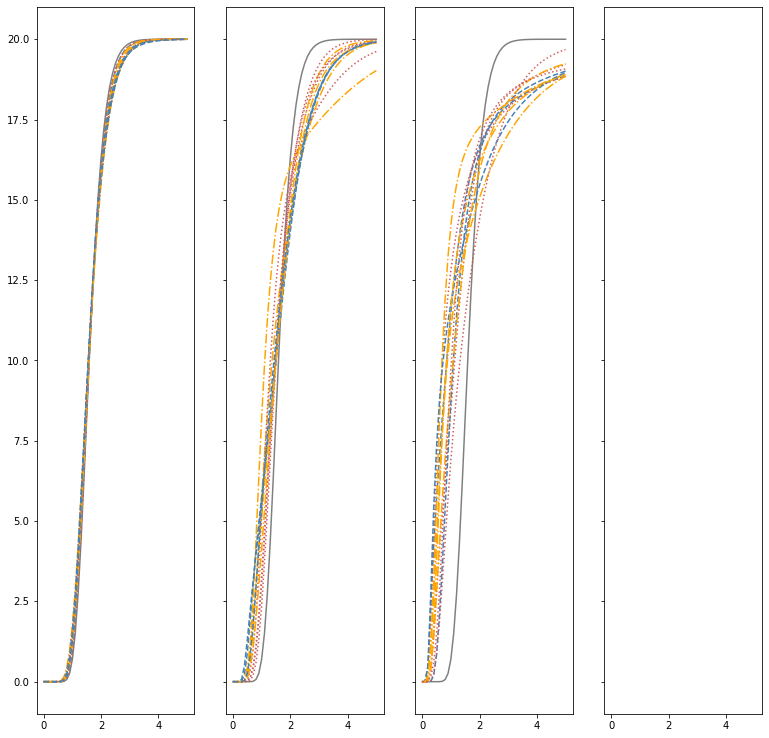

In [42]:
Regimes = ["Fast"]
varlist = [0,1,2,3]
Varcol = {0.1:'indianred',1 :'orange',5:'g',10:'steelblue'}
Anlin = {2 :':', 5:'-.', 10:'--'}
Ancol = {2:'indianred',5 :'orange',10:'steelblue'}
days_slow = list(range(301))
days_medium = list(np.arange(0,30.1,0.1))
#days_fast = list(np.arange(0,2.01,0.01))
days_fast = list(np.arange(0,5.1,0.1))
figbig, axes = plt.subplots(len(Regimes),4, figsize=(13, 10), sharey = True, sharex = True)
for v,i in zip(list(Varcol.keys()), varlist):
    Trial = list(t for t in trialist if trialist[t]["Het"]==v and t not in droplist)
    for r,xindex in zip(Regimes, [days_fast, days_medium, days_slow]):
        ridx = Regimes.index(r)*len(varlist) + i
        host = axes.flat[ridx]
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,-1,0,-1,113, gvarnames,"Unsaturated")
        host.plot(xindex, conctimeh[:, -6, 0],label=gvarnames[0],color='grey',linestyle="-")
        for t in Trial:
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,-1,0,-1,113, gvarnames,"Unsaturated")
            host.plot(xindex, conctime[:, -6, 0],label=gvarnames[0],color=Ancol[trialist[t]["Anis"]],linestyle=Anlin[trialist[t]["Anis"]])
for ax,v in zip(axes[-1,:], list(Varcol.keys())):
    ax.set_title ("Variance: " + str(v))
for ax in axes[-1,:]:
    ax.set_xlabel ("Time (days)")
for ax,r in zip(axes[:,0], Regimes):
    ax.set_ylabel(r + " flow")

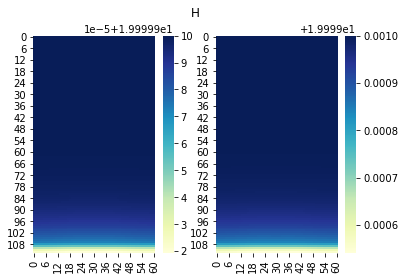

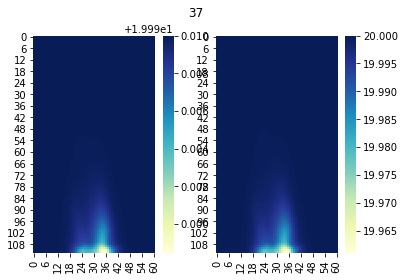

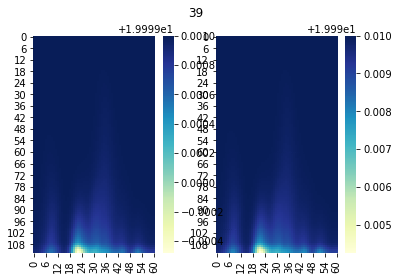

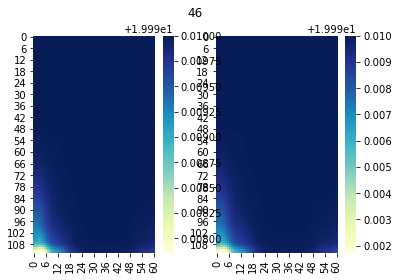

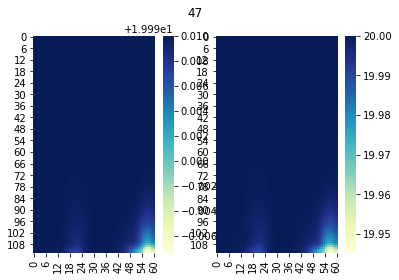

In [12]:
r = "Fast"
for t in Trial:
    file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    fig,axes = plt.subplots(1,2)
    sns.heatmap (data[-1, -1, :, :], cmap = "YlGnBu", ax = axes[0])
    sns.heatmap (data[-1, -5, :, :], cmap = "YlGnBu", ax = axes[1])
    plt.suptitle(t)

# Reactive species: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of reactive species in 1D domain
- Defining the function for heatmaps of reactive species concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [ ]:
def profile1d(Trial):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    compare_1 = -1
    compare_2 = -5
    #Defining base figure parameters
    dashedline = mlines.Line2D([], [], linestyle = '--', color='grey', markersize=15, label='Homogeneous')
    solidline = mlines.Line2D([], [], linestyle = 'solid', color='grey', markersize=15, label='Heterogeneous')
    blue_patch = mpatches.Patch(color="blue", label= 'Ammonium', alpha = 0.5)
    red_patch = mpatches.Patch(color = "red", label =  'DO', alpha = 0.5)
    black_patch = mpatches.Patch(color="black", label= 'DOC', alpha = 0.5)
    green_patch = mpatches.Patch(color="darkgreen", label='Nitrate', alpha = 0.5)
    patchlist = [blue_patch, green_patch, red_patch, black_patch, dashedline, solidline]
    legendsize = 16
    axissize = 16
    ticksize = 14
    titlesize = 20        
    
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    gvarnames = ["DO", "DOC", "Ammonium", "Nitrate"]
    cvars = list(species[g]['TecIndex'] for g in gvarnames)
    velindex = 2
    colors = ["red", "black", "blue", "darkgreen"]
    columntitles = ["Slow flow", "Medium flow", "Fast flow"]
    pad = 230 
    figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
    for t in Trial:
        for r in Regimes:
            fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
            datah = np.load(fileh)
            i = Trial.index(t)*len(Regimes) + Regimes.index(r)
            host = axes.flat[i]
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,50,0,30, 51, gvarnames,"Unsaturated")
            conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,50,0,30, 51, gvarnames,"Unsaturated")
            yindex = list(range(51))
            #fig, host = axe.subplots()
            host.plot(conctimeh[compare_1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[compare_1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[compare_1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[compare_1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            host.plot(conctimeh[compare_2, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[compare_2, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[compare_2, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[compare_2, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            par1 = host.twiny()
            par2 = host.twiny()
    
            # Offset the top spine of par2.  The ticks and label have already been
            # placed on the top by twiny above.
            par2.spines["top"].set_position(("axes", 1.2))
            # Having been created by twinx, par2 has its frame off, so the line of its
            # detached spine is invisible.  First, activate the frame but make the patch
            # and spines invisible.
            make_patch_spines_invisible(par2)
            # Second, show the right spine.
        
            par1.plot(conctimeh[compare_1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[compare_1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[compare_1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[compare_1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
            par1.plot(conctimeh[compare_2, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[compare_2, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[compare_2, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[compare_2, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
    
            host.set_ylim(0, 51)
            host.set_xlim(0, 800)
            par1.set_xlim(0, 60)
            par2.set_xlim(50, 260)
            host.xaxis.label.set_color("black")
            tkw = dict(size=4, width=1.5, labelsize=ticksize)
            host.tick_params(axis="x", colors="black", **tkw)
            host.tick_params(axis="y", **tkw)
            if i < 3:
                host.set_title (r + " flow", fontsize = axissize)
                par2.spines["top"].set_visible(True)
                par1.xaxis.label.set_color("blue")
                par2.xaxis.label.set_color("darkgreen")
                par1.tick_params(axis="x", colors="blue", **tkw)
                par2.tick_params(axis="x", colors="darkgreen", **tkw)
                par1.set_xlabel(str(gvarnames[2]) + " (uM)", fontsize=axissize)
                par2.set_xlabel(str(gvarnames[3]) + " (uM)", fontsize=axissize)
            elif i > 5:
                host.set_xlabel("DOC, DO (uM)", fontsize=axissize)
                par1.set_xticks([])
                par2.set_xticks([])
            else:
                par1.set_xticks([])
                par2.set_xticks([])
    figbig.gca().invert_yaxis()
    figbig.subplots_adjust(top=1.0, hspace = 0.2, wspace = 0.2)               
    for t,a in zip(Trial[::-1],range(3)):
        plt.annotate("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                     xy=(0.1, 0.17), xytext=(-50, 0.7 + pad*a),
                    xycoords='figure fraction', textcoords='offset points',
                    rotation = "vertical",
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
        axes.flat[3*a].set_ylabel("Y (cm)", fontsize=axissize)
    plt.legend(handles = patchlist, ncol = 3, fontsize = legendsize,
               bbox_to_anchor = (-0.2,-0.6),
               loc = 'lower right')
    
    return None

def profile2d(Trial, gvarnames):
    import matplotlib.gridspec as gridspec
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
    fig = plt.figure(figsize=(14, 20))
    outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
    pad = 210
    for t in Trial:
        #file = os.path.join(raw_dir, "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy")
        file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
        axe = plt.Subplot(fig, left[0])
        velocity = abs(data[velindex, -1, :, :])
        sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
        axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
    
        for r in Regimes:
            i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
            if i%4 != 0:
                inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                         subplot_spec=outer[i], wspace=0.4, hspace=0.15)
                file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                for g in gvarnames:
                    axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"], -1, :, :], cmap = colorscheme, ax= axe)
                    axe.set_title(g, fontsize = 13, ha = "center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(4):
        plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                    xycoords='figure fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
    #fig.show()
    
    return None

## Reactive species: 1D profile

In [ ]:
modeltrial = ["50", "73", "63"]
profile1d(modeltrial)
#picname = os.path.join(output_dir, "dissolved_species_1D.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = os.path.join(ouput_dir, "dissolved_species_1D.pdf")
#plt.savefig(picname, bbox_inches = 'tight', pad_inches = 0.1)

### Reactive species: 1D profile: Takeaways
- The flux averaged concentration profile follows trends of the saturated scenarios.
- Homogeneous domain has higher or equal removal of reactive species compared to the heterogeneous scenarios with the exception of Nitrate in the fast flow regime.
- Exception: Nitrate is consumed to a higher extent in the heterogeneous domains in the fast flow regime compared to the base case (homogeneous domain).

## Reactice species: 2D profile/heatmaps

In [ ]:
profile2d(["H","50", "73", "63"], ["DO", "DOC", "Ammonium", "Nitrate"])

### Reactive species: 2D profile: Takeaways

- DOC/DO are persistent along preferential flowpaths
- Reduction of nitrate kicks in further downgradient along the preferential flowpaths (if at all) or in low permeability zones.

# Visualize velocities and saturation for context

- Units of velocity are m/d
- P is Pressure (kPa)
- Sat is saturation (m3/m3) varying betwen 0.2 and 0.8. So sat = 0.8 means effective saturation = 1, and sat = 0.2 means effective saturation = 0

In [ ]:
import matplotlib.gridspec as gridspec
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = ["H","37", "41", "45"]
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat"]
gindx = [0,1,2,4]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
fig = plt.figure(figsize=(14, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
pad = 210
for t in Trial:
    file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    left = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
    axe = plt.Subplot(fig, left[0])
    velocity = abs(data[velindex, -1, :, :])
    sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
    axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
    axe.set_xticks([])
    axe.set_yticks([])
    fig.add_subplot(axe)    
    for r in Regimes:
        i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
        if i%4 != 0:
            inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                        subplot_spec=outer[i], wspace=0.4, hspace=0.15)
            file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            for g in gvarnames:
                axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                sns.heatmap (data[gindx[gvarnames.index(g)], -1, :, :], cmap = colorscheme, ax= axe)
                axe.set_title(g, fontsize = 13, ha = "center")
                axe.set_xticks([])
                axe.set_yticks([])
                fig.add_subplot(axe)
for a in range(4):
    plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                xycoords='figure fraction', textcoords='offset points',
                size='large', ha='center', va='baseline',
                fontsize = 16)
fig.show()

In [ ]:
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = list(trialist.keys())
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat", "Tracer"]
gindx = [0,1,2,4]
velindex = 2
vedge = 0.01/2
velem = 0.01
por = 0.2
def effsat(data):
    slope = 1/(0.8-0.2)
    constant = -1/3
    sat = slope*data + constant
    return sat
row = []
for r in Regimes:
    for t in Trial:
        file = os.path.join(raw_dir, r+"AR_0", r+ "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        velx = data[1, -1, :, :]
        vely = data[2, -1, :, :]
        sat = effsat(data[4,-1,:,:])
        fedge = (np.sqrt(velx[0,0]**2 + vely[0,0]**2)*sat[0,0] + (velx[0,-1]**2 + vely[0,-1]**2)*sat[0,-1]+
       np.sqrt (velx[-1,0]**2 + vely[-1,0]**2)*sat[-1,0]+np.sqrt(velx[-1,-1]**2 + vely[-1,-1]**2)*sat[-1,-1])*vedge**2*por
        fboundaries = (sum(np.sqrt(velx[0,1:-1]**2 + vely[0,1:-1]**2)*sat[0,1:-1] +
                           np.sqrt(velx[-1,1:-1]**2 + vely[-1,1:-1]**2)*sat[-1,1:-1])+
            sum(np.sqrt(velx[1:-1,0]**2 + vely[1:-1,0]**2)*sat[1:-1,0]+
            np.sqrt(velx[1:-1,-1]**2 + vely[1:-1,-1]**2)*sat[1:-1,-1]))*vedge*velem*por
        felem = np.sum(np.sqrt(velx[1:-1,1:-1]**2 + vely[1:-1,1:-1]**2)*sat[1:-1,1:-1])*velem*velem*por
        fluxtotal = fedge + fboundaries + felem
        flux_avg = (fedge + fboundaries + felem)/(0.15*por)
        veledge = (np.sqrt(velx[0,0]**2 + vely[0,0]**2) + np.sqrt(velx[0,-1]**2 + vely[0,-1]**2)+
       np.sqrt (velx[-1,0]**2 + vely[-1,0]**2)+np.sqrt(velx[-1,-1]**2 + vely[-1,-1]**2))*vedge**2*por
        velboundaries = (sum(np.sqrt(velx[0,1:-1]**2 + vely[0,1:-1]**2) + np.sqrt(velx[-1,1:-1]**2 + vely[-1,1:-1]**2))+
        sum(np.sqrt(velx[1:-1,0]**2 + vely[1:-1,0]**2)+np.sqrt(velx[1:-1,-1]**2 + vely[1:-1,-1]**2)))*vedge*velem*por
        velelem = np.sum(np.sqrt(velx[1:-1,1:-1]**2 + vely[1:-1,1:-1]**2))*velem*velem*por
        veltotal = (veledge + velboundaries + velelem)/(0.15*por)
        #velcs = np.sum((velx**2 + vely**2)*sat*0.01*0.01, axis = -1)
        #meanvel = np.sum(velcs)/(0.3*0.5*sum(sat))
        #meansat = np.sum(data[4,-1,:,:])/0.5*0.3
        satedge = (sat[0,0] + sat[0,-1]+sat[-1,0]+sat[-1,-1])*vedge**2*por
        satboundaries = (sum(sat[0,1:-1] + sat[-1,1:-1])+ sum(sat[1:-1,0]+sat[1:-1,-1]))*vedge*velem*por
        satelem = np.sum(sat[1:-1,1:-1])*velem*velem*por
        sattotal = (satedge + satboundaries + satelem)/(0.15*por)
        row.append([r,t,trialist[t]["Het"],trialist[t]["Anis"],fluxtotal, flux_avg, veltotal, sattotal])

In [ ]:
meanvelocity = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "Variance", "Anisotropy","Total_flux","Avg_flux","Avg_Velocity", "Saturation"])    
meanvelocity.to_csv(os.path.join(results_dir,"low_sat_total_velocity_saturation.csv"))

In [ ]:
meanvelocity["V_A"] = meanvelocity.Variance.astype(str)+":"+meanvelocity.Anisotropy.astype(str)
print(meanvelocity.groupby(["Regime"])["Saturation"].mean())
print(meanvelocity.groupby(["Regime"])["Avg_flux"].mean())
print(meanvelocity.groupby(["Regime"])["Avg_Velocity"].mean())

In [ ]:
print(meanvelocity.groupby(["Regime"])["Total_flux"].describe())

In [ ]:
for parameter in ["Total_flux", "Avg_flux", "Avg_Velocity", "Saturation"]:
    fig, axes = plt.subplots(1,3, figsize = (14,4))
    plt.suptitle(parameter, fontsize = 18)
    sns.boxplot(y=parameter, data = meanvelocity[meanvelocity.Regime=='Slow'], ax = axes[0], color = "orange")
    sns.boxplot(y=parameter, data = meanvelocity[meanvelocity.Regime=='Equal'], ax = axes[1], color = "green")
    sns.boxplot(y=parameter, data = meanvelocity[meanvelocity.Regime=='Fast'], ax = axes[2], color = "steelblue")
    for a in axes:
        a.set_ylabel("")
    axes[0].set_title("Slow", fontsize = 16)
    axes[1].set_title("Medium", fontsize = 16)
    axes[2].set_title("Fast", fontsize = 16)
    plt.savefig(os.path.join(results_dir,parameter+"_boxplot.png"))
    fig, axes = plt.subplots(1,3, figsize = (14,4), sharey=True)
    plt.suptitle(parameter, fontsize = 18)
    sns.distplot(meanvelocity[meanvelocity.Regime=='Slow'][parameter], ax = axes[0], kde=False, color = "orange")
    sns.distplot(meanvelocity[meanvelocity.Regime=='Equal'][parameter], ax = axes[1], kde=False, color = "green")
    sns.distplot(meanvelocity[meanvelocity.Regime=='Fast'][parameter], ax = axes[2], kde=False, color = "steelblue")
    for a in axes:
        a.set_ylabel("")
    axes[0].set_title("Slow", fontsize = 16)
    axes[1].set_title("Medium", fontsize = 16)
    axes[2].set_title("Fast", fontsize = 16)
    plt.savefig(os.path.join(results_dir,parameter+"_distplot.png"))

In [ ]:
withoutH = meanvelocity[meanvelocity.Trial!="H"]
print(withoutH.groupby(["Regime"])["Saturation"].mean())
print(withoutH.groupby(["Regime"])["Total_flux"].mean())
print(withoutH.groupby(["Regime"])["Avg_Velocity"].mean())

#### Average velocities vary between different domains.

In [ ]:
boxdata = withoutH.sort_values(["Variance", "Anisotropy"])
sns.boxplot(x = boxdata.V_A, y=boxdata.Saturation, hue = boxdata.Regime)

#### Check average permeability

In [ ]:
trialist = proc.masterscenarios()
Trial = list(trialist.keys())
species = proc.speciesdict("Unsaturated")
row = []
for r in Regimes:
    for t in Trial:
        file = os.path.join(raw_dir, r+"AR_0", "RF-A"+str(t),"A"+str(t)+"-T.dat")
        data = np.loadtxt(file, skiprows = 11, usecols = (3), max_rows = 1581)
        meanratio = np.mean(data)
        row.append([r,t, meanratio])
meanvelocity = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "MeanRatio"])

In [ ]:
meanvelocity.to_csv(os.path.join(results_dir,"low_sat_mean_permeability.csv"))

## Check for average, minimum, maximum percentage difference in values between two time points for steady state
### Each simulation is running for 5,000 days currently

In [ ]:
species = proc.speciesdict("Unsaturated")
initial = -2
final = -1
yin = 0
yout = -1
varnum = np.arange(28)
row = []
for r in Regimes:
    for t in Trial:
        file = os.path.join(raw_dir, r+"AR_0", r+ "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        if np.shape(data)[1]>1:
            for v in varnum:
                percentage_diff = abs(100*(data[v,final,yin:yout,:] - data[v,initial,yin:yout,:])/data[v,initial,yin:yout,:])
                median_diff = np.median(percentage_diff)
                average_diff = np.mean(percentage_diff)
                row.append([r,t,v,median_diff, average_diff])
        else:
            continue
#meanvelocity = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "MeanRatio"])

In [ ]:
df = pd.DataFrame.from_records(row, columns=["Regime","Trial","Feature","Median_diff","Average_diff"])
df.to_csv(os.path.join(results_dir,"check_steady_state_24052021.csv"))

In [ ]:
df.groupby(["Regime","Feature"])["Average_diff"].describe()

In [ ]:
df.groupby(["Regime","Trial"])["Average_diff"].describe()

In [ ]:
df[(df.Regime=="Medium") & (df.Trial=="H")]

## Check for incoming water velocity and outgoing water velocity at the last time step

In [ ]:
gvarnames = ["P","VX", "VY", "Sat", "Tracer"]
gindx = [0,1,2,4]
velindex = 2
vedge = 0.01/2
velem = 0.01
por = 0.2
yin = [0,4,5,6]
yout = [-1, -4, -6]
voly=0.005 #0.01
def effsat(data):
    slope = 1/(0.8-0.2)
    constant = -1/3
    sat = slope*data + constant
    return sat
row = []
for yi in yin:
    for yo in yout:
        for r in Regimes:
            for t in Trial:
                file = os.path.join(raw_dir, r+"AR_0", r+ "AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                velx = data[1, -1, :, :]
                vely = data[2, -1, :, :]
                sat = data[4,-1,:,:]
                veledgi = (vely[yi,0]*sat[yi,0] + vely[yi,-1]*sat[yi,-1])*0.005*voly
                veledgo = (vely[yo,-1]*sat[yo,-1] + vely[yo,-1]*sat[yo,-1])*0.005*voly
                sumvelin = sum(vely[yi,1:-1]*sat[yi,1:-1]+vely[yi,1:-1]*sat[yi,1:-1])*voly*0.01 + veledgi
                sumvelout = sum(vely[yo,1:-1]*sat[yo,1:-1]+vely[yo,1:-1]*sat[yo,1:-1])*voly*0.01 + veledgo
                #sumvelin = sum(vely[yi,:]*sat[yi,:])
                #sumvelout = sum(vely[yo,:]*sat[yo,:])
                delta = sumvelin-sumvelout
                row.append([r,t,trialist[t]["Het"],trialist[t]["Anis"],sumvelin, sumvelout, delta, delta/sumvelin, veledgi, veledgo, yi, yo])

In [ ]:
in_outvel = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "Variance", "Anisotropy","flux_in","flux_out","Delta", "Rel_delta", "flux_edge_in", "flux_edge_out", "Inlet", "Outlet"])    
in_outvel.to_csv(os.path.join(results_dir,"in_out_flux_comparison_bigsat_24052021.csv"))

In [ ]:
in_outvel.groupby(["Regime", "Variance"])["Rel_delta"].median()*100

In [ ]:
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = list(trialist.keys())
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat", "Tracer"]
gindx = [0,1,2,4]
velindex = 2
vedge = 0.01/2
velem = 0.01
por = 0.2
def effsat(data):
    slope = 1/(0.8-0.2)
    constant = -1/3
    sat = slope*data + constant
    return sat
row = []
for r in Regimes:
    for t in Trial:
        file = os.path.join(raw_dir, r+"AR_0", r+ "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        velx = data[1, -1, :, :]
        vely = data[2, -1, :, :]
        sat = data[4,-1,:,:]
        velledg = vely[0,0]
        velredg = vely[0,-1]
        velelem = sum(vely[0,1:-1])/29
        velin = np.sum(velledg+velredg + velelem*29)/31
        sumvelelemin = np.sum(velelem)
        sumvelin = np.sum(velelem)+velledg+velredg
        row.append([r,t,trialist[t]["Het"],trialist[t]["Anis"],velledg, velredg, velelem, velin, sumvelelemin, sumvelin])

In [ ]:
veldata = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "Variance", "Anisotropy","Vel_left_edge", "Vel_right_edge", "Avg_Vel_elem","Avg_Vel_in", "Sum_Vel_elements", "Sum_Vel_in"])
veldata.to_csv(os.path.join(results_dir,"Vel_comparison_06042021.csv"))